In [1]:
%matplotlib notebook
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d
import astropy.units as u
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
from astropy.coordinates import Distance

/Users/Meredith/Applications/Ureka/variants/common/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
infile = 'RGEB_distinfo.txt'
target_col = 0
RA_col = 3; Dec_col = 4
dist_col = 6; derr_col = 7
FeH_col = 8
usecols = (target_col, RA_col, Dec_col, dist_col, derr_col, FeH_col)

# Read in target information from a text file
targets, RAs, Decs, dists, derrs, FeHs = np.loadtxt(infile, comments='#', usecols=usecols, 
    dtype={'names': ('targets', 'RAs', 'Decs', 'dists', 'derrs', 'FeHs'),
    'formats': (np.int, '|S11','|S11', np.float64, np.float64, np.float64)}, unpack=True)

# Put the RAs, Decs, and distances in a more useful format
RAs = coord.Angle(RAs, unit=u.hour)
Decs = coord.Angle(Decs, unit=u.degree)
dists = dists*u.pc
derrs = derrs*u.pc

# Define a SkyCoord object for each target
starlocs = []
for target, RA, Dec, dist, derr in zip(targets, RAs, Decs, dists, derrs):
    starlocs.append( SkyCoord(ra=RA, dec=Dec, distance=dist) )

# Create galactocentric coordinates for each target
# Assign colors as a function of metallicity
star_galcens = []
colorlist = []
for star, FeH in zip(starlocs, FeHs):
    if star.distance > 0:
        star_galcens.append(star.transform_to(coord.Galactocentric))
        if FeH < -0.8: color='#ffffb2' #yellowest
        elif FeH >= -0.8 and FeH < -0.6: color='#fed976'
        elif FeH >= -0.6 and FeH < -0.4: color='#feb24c'
        elif FeH >= -0.4 and FeH < -0.2: color='#fd8d3c'
        elif FeH >= -0.2 and FeH < 0.0: color='#fc4e2a'
        elif FeH >= 0.0 and FeH < 0.2: color='#e31a1c'
        elif FeH >= 0.2: color='#b10026' #reddest
        colorlist.append(color)

<IPython.core.display.Javascript object>


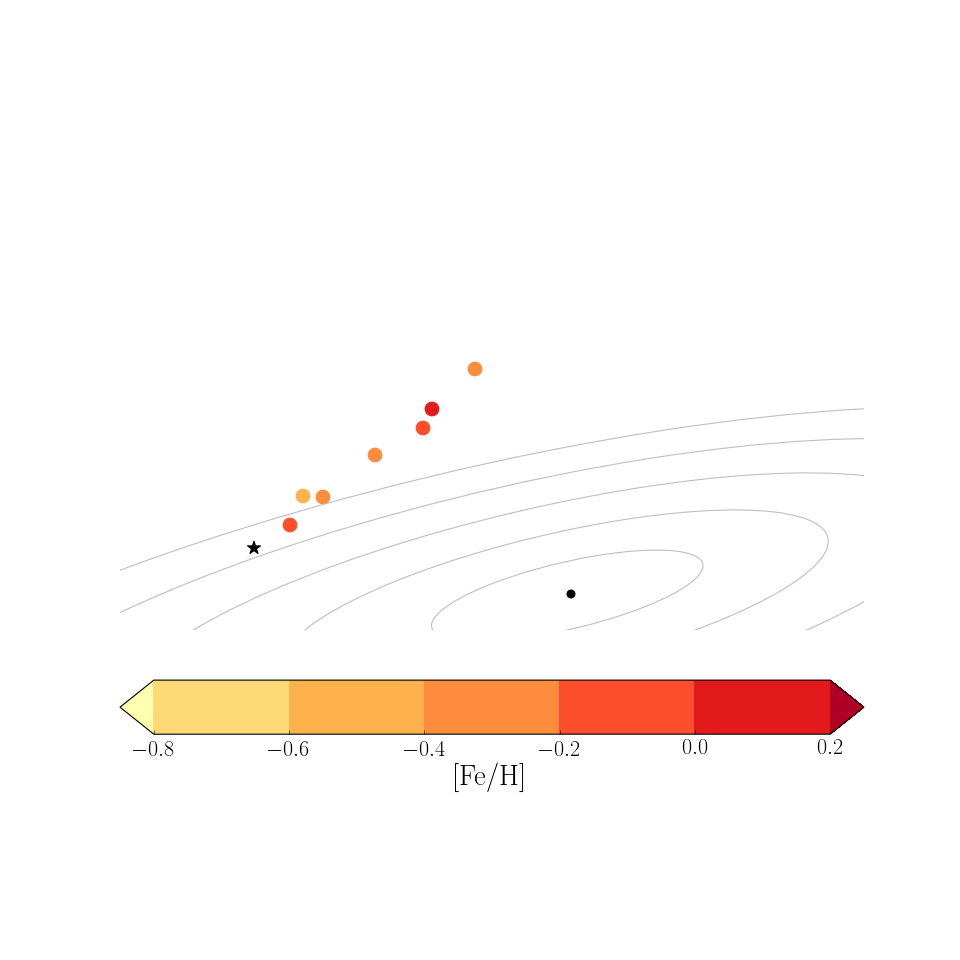

In [3]:
# Make a figure
fig = plt.figure()

ax1 = fig.add_subplot(1,1,1, projection='3d', aspect='equal')
ax1.set_axis_off() 
ax1.grid(False)
ax1.xaxis.set_ticklabels([])
ax1.yaxis.set_ticklabels([])
ax1.zaxis.set_ticklabels([])
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.zaxis.set_ticks([])
for i, star in enumerate(star_galcens):
    ax1.scatter(star.x, star.y, star.z, c=colorlist[i], edgecolors=colorlist[i], s=150)
ax1.scatter(0, 0, 0, marker='o', c='k', edgecolors='k', s=50) # galactic center
ax1.scatter(-8300, 0, 27, marker='*', c='k', edgecolors='k', s=150) # Sun

# Contour-type circles that radiate out from the galactic center for reference
circle1 = plt.Circle((0,0), 2000, color='0.75', fill=False)
circle2 = plt.Circle((0,0), 4000, color='0.75', fill=False)
circle3 = plt.Circle((0,0), 6000, color='0.75', fill=False)
circle4 = plt.Circle((0,0), 8000, color='0.75', fill=False)
circle5 = plt.Circle((0,0), 10000, color='0.75', fill=False)
ax1.add_patch(circle1); ax1.add_patch(circle2)
ax1.add_patch(circle3); ax1.add_patch(circle4)
ax1.add_patch(circle5)
art3d.pathpatch_2d_to_3d(circle1, z=0, zdir='z')
art3d.pathpatch_2d_to_3d(circle2, z=0, zdir='z')
art3d.pathpatch_2d_to_3d(circle3, z=0, zdir='z')
art3d.pathpatch_2d_to_3d(circle4, z=0, zdir='z')
art3d.pathpatch_2d_to_3d(circle5, z=0, zdir='z')

# Colorbar key
ax2 = fig.add_subplot(12,1,10)
cmap = mpl.colors.ListedColormap(['#fed976', '#feb24c', '#fd8d3c', '#fc4e2a', '#e31a1c'])
cmap.set_over('#b10026') #reddest, high Fe/H
cmap.set_under('#ffffb2') #yellowest, low Fe/H
bounds = [-0.8, -0.6, -0.4, -0.2, 0.0, 0.2]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, ticks=bounds, extend='both', 
    boundaries=[-1.0]+bounds+[0.4], spacing='proportional', orientation='horizontal')
cb.set_label('[Fe/H]', size=26)